## Section 8: Palisades/ Eaton EJ map

### Load in data

In [1]:
import pandas as pd 
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx


In [2]:
census = gpd.read_file('data/EJI_2024_California/EJI_2024_California.gdb')


##### Eaton wrangling

In [3]:
eaton_perimeter = gpd.read_file('data/Eaton_Perimeter_20250121/Eaton_Perimeter_20250121.shp')

In [4]:
census = census.to_crs(3857)
census.crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [5]:
census.crs == eaton_perimeter.crs

True

####

#### Palisades Wrangling

In [6]:
palisade_perimeter = gpd.read_file('data/Palisades_Perimeter_20250121/Palisades_Perimeter_20250121.shp')
palisade_perimeter.crs == census.crs

True

### Polygon Intersection

In [7]:
filtered_census_palisade = gpd.sjoin(census, palisade_perimeter, predicate='intersects')


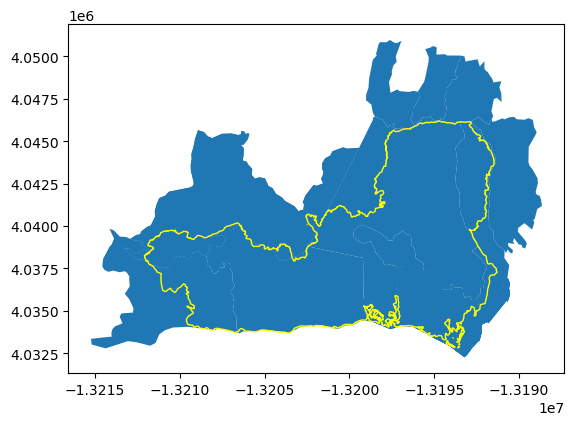

In [8]:
fig, ax = plt.subplots()
filtered_census_palisade.plot(ax=ax)
palisade_perimeter.plot(ax=ax, color='none', edgecolor='yellow')

plt.show()

In [9]:
filtered_census_eaton = gpd.sjoin(census, eaton_perimeter, predicate='intersects')


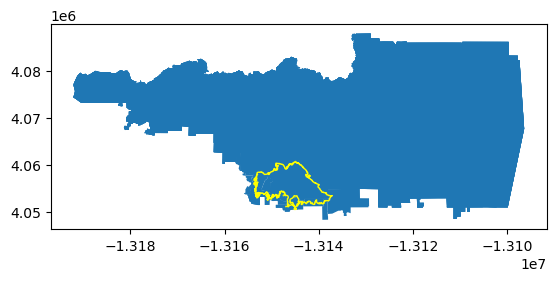

In [10]:
fig, ax = plt.subplots()
filtered_census_eaton.plot(ax=ax)
eaton_perimeter.plot(ax=ax, color='none', edgecolor='yellow')

plt.show()

### Polygon Clipping

In [11]:
census_within_palisades = gpd.clip(filtered_census_palisade, palisade_perimeter)
census_within_eaton = gpd.clip(filtered_census_eaton, eaton_perimeter)

### Create plot of both fires with basemap

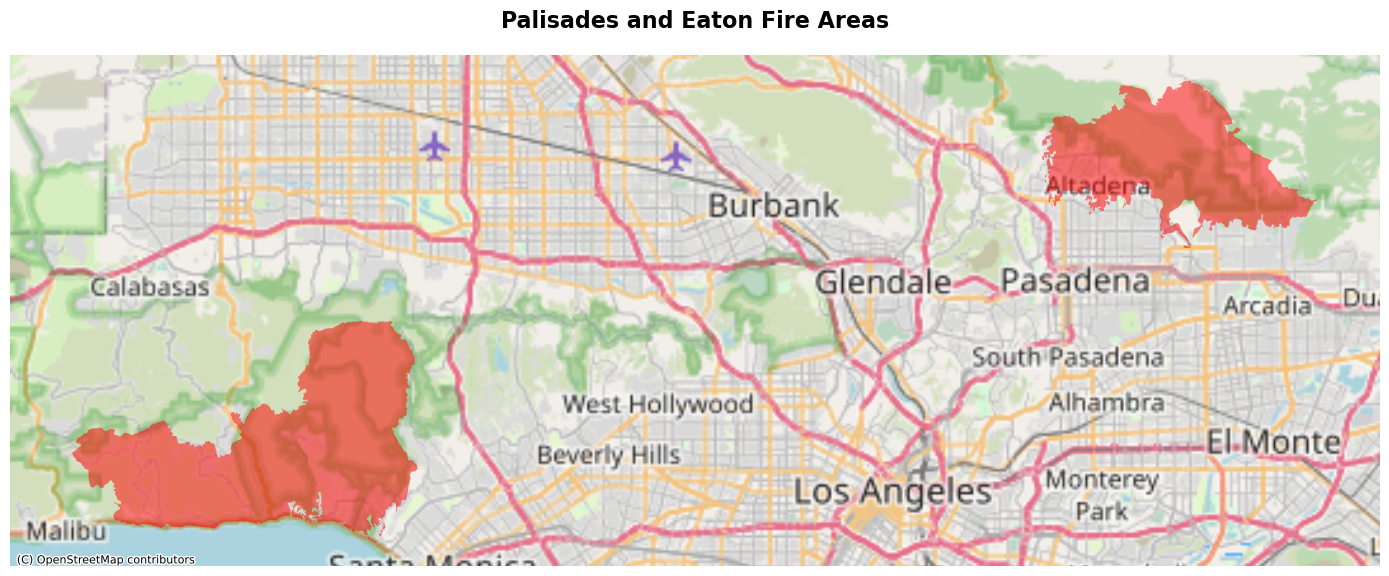

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(14, 12))

# Plot the reprojected data
palisade_perimeter.plot(ax=ax, facecolor='red', linewidth=3, alpha = 0.5)
eaton_perimeter.plot(ax=ax, facecolor='red', linewidth=3, alpha = 0.5)

# Add basemap
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)


ax.set_title('Palisades and Eaton Fire Areas', fontsize=16, fontweight='bold', pad=20)
ax.axis('off')
plt.tight_layout()
plt.show()

### Visualize EJI Data 

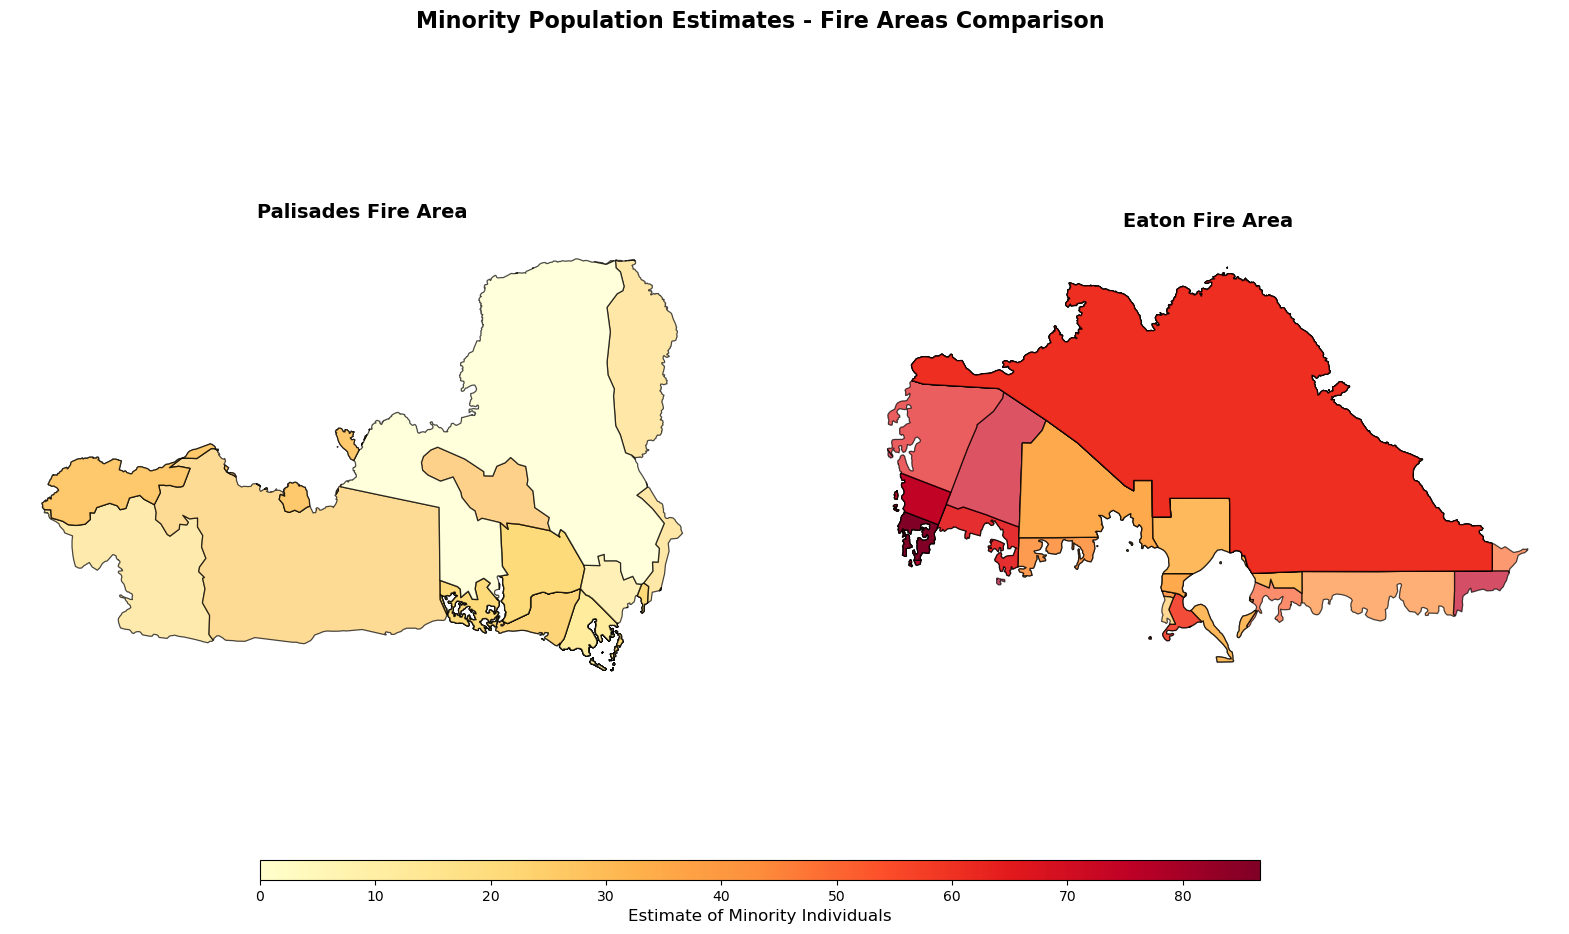

In [13]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

# Find common min/max for legend range
vmin = min(census_within_palisades['E_MINRTY'].min(), census_within_eaton['E_MINRTY'].min())
vmax = max(census_within_palisades['E_MINRTY'].max(), census_within_eaton['E_MINRTY'].max())


# Plot census tracts within perimeter
census_within_palisades.plot(
    column='E_MINRTY', 
    cmap='YlOrRd',
    vmin=vmin, vmax=vmax,
    legend=False,
    ax=ax1,
    edgecolor='black',
    linewidth=0.9,
    alpha=0.7
)



ax1.set_title('Palisades Fire Area', fontsize=14, fontweight='bold', pad=15)
ax1.axis('off')



# Plot census tracts within perimeter
census_within_eaton.plot(
    column='E_MINRTY', 
    cmap='YlOrRd',
    vmin=vmin, vmax=vmax,
    legend=False,
    ax=ax2,
    edgecolor='black',
    linewidth=0.9,
    alpha=0.7
)



ax2.set_title('Eaton Fire Area', fontsize=14, fontweight='bold', pad=15)
ax2.axis('off')

# Add overall title
fig.suptitle('Minority Population Estimates - Fire Areas Comparison', 
             fontsize=16, fontweight='bold', y=0.95)

# Add shared colorbar at the bottom
sm = plt.cm.ScalarMappable(cmap='YlOrRd', norm=plt.Normalize(vmin=vmin, vmax=vmax))
cbar_ax = fig.add_axes([0.25, 0.08, 0.5, 0.02])  # [left, bottom, width, height]
cbar = fig.colorbar(sm, cax=cbar_ax, orientation='horizontal')
cbar.set_label('Estimate of Minority Individuals', fontsize=12)

plt.show()